In [3]:
from IPython.display import Latex

In [4]:
import ast

In [5]:
import showast

### Goal

In this project, we will try to build a transpiler from Python syntax into Latex. This would support converting simple expression such as (`x**2 + 1` -> $x^2 +1$). The expression would be valid Python expression. 

Some examples:


| `python` | $\LaTeX$ |
|:--------:|:-------:|
| `x**2` | $x^2$ |
| `x**2 + x - 1` | $x^2 + x - 1$ |
| `3*x + x - 1` | $3 \cdot x + x -1$ |
| `1/x` | $\frac{1}{x}$|
| `x**2 / (x**2 + x - 1)` | $\frac{x^2}{x^2 + x - 1}$|
|`x == 1` | $x = 1$|
| ` x< 1` | $x < 1$


# Code

In [ ]:
operator = Add | Sub | Mult | Div | Mod | Pow 
    cmpop = Eq | NotEq | Lt | LtE | Gt | GtE | Is | IsNot | In | NotIn


In [140]:
class Latexify(ast.NodeVisitor):
    OP_MAP = {
        ast.Add : "+",
        ast.Sub: "-",
        ast.Mult: "\\cdot", # This is due to preference
        ast.Pow : "^",
        ast.Div: None, # Special case
        ast.Eq: "=",
        ast.NotEq: "\\neq",
        ast.Lt: "<",
        ast.Gt: ">",
        ast.LtE: "\\leq" ,
        ast.GtE: "\\geq",
        
    }
    
    def visit_Module(self, node):
        return list(map(self.visit, node.body))
    
    def visit_Expr(self, node):
        return self.visit(node.value)  
    
    def visit_Name(self, node):

        return str(node.id)
    
    def visit_Num(self, node):
        return node.n
    
    def visit_BinOp(self, node):
        l = self.visit(node.left)
        r = self.visit(node.right)
        op = self.OP_MAP.get(type(node.op))
        
        if type(node.op) is ast.Div:
            return f"\\frac{{{l}}}{{{r}}}"
                
        if not op:
            raise ValueError("Can't find supported operator")

        return f"{{ {l} }} {op} {{ {r} }}" # Who knows that escaping braces in Python f-string is more braces
    
    def visit_Compare(self, node):
        l = self.visit(node.left)
        r = self.visit(node.comparators[0])
        op = self.OP_MAP.get(type(node.ops[0]))

        if not op:
            raise ValueError("Can't find supported operator")


        return f"{{ {l} }} {op} {{ {r} }}"

In [129]:
def show_parsed(v):
    p = ast.parse(v)
    r = Latexify().visit(p)
    print(r[0])
    if len(r) > 0:
        return Latex(f"${r[0]}$")

In [130]:
show_parsed("x")

x


<IPython.core.display.Latex object>

In [131]:
show_parsed("x+1")

{ x } + { 1 }


<IPython.core.display.Latex object>

In [132]:
show_parsed("x**2")

{ x } ^ { 2 }


<IPython.core.display.Latex object>

In [133]:
show_parsed("x**2 + x +1")

{ { { x } ^ { 2 } } + { x } } + { 1 }


<IPython.core.display.Latex object>

In [134]:
show_parsed("3*x  + x - 1")

{ { { 3 } \cdot { x } } + { x } } - { 1 }


<IPython.core.display.Latex object>

In [135]:
show_parsed("1/x")

\frac{1}{x}


<IPython.core.display.Latex object>

In [136]:
show_parsed("x**2 / (x**2 + x - 1)")

\frac{{ x } ^ { 2 }}{{ { { x } ^ { 2 } } + { x } } - { 1 }}


<IPython.core.display.Latex object>

In [137]:
show_parsed("x == 1")

{ x } = { 1 }


<IPython.core.display.Latex object>

In [138]:
show_parsed("x + 2 < 3")

{ { x } + { 2 } } < { 3 }


<IPython.core.display.Latex object>

In [139]:
show_parsed("x + 2 >= 3")

{ { x } + { 2 } } \geq { 3 }


<IPython.core.display.Latex object>

# Scratch work

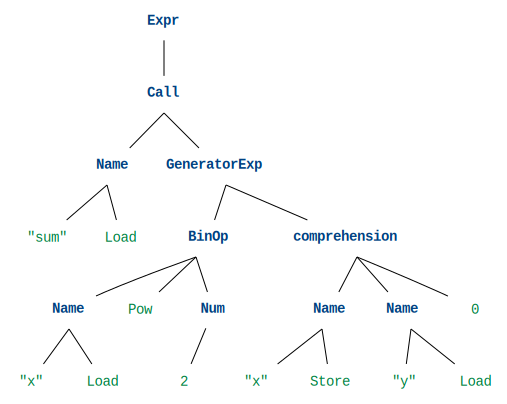

In [98]:
%%showast

sum(x**2 for x in y)

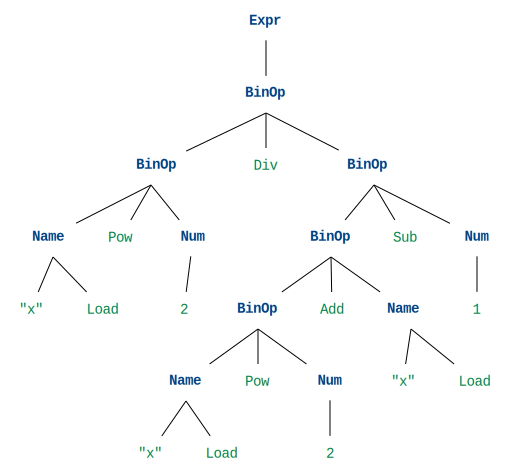

In [101]:
%%showast

x**2 / (x**2 + x - 1)

In [15]:
ast.dump(ast.parse("sum(x**2 for x in y)")))

"Module(body=[Expr(value=Call(func=Name(id='sum', ctx=Load()), args=[GeneratorExp(elt=BinOp(left=Name(id='x', ctx=Load()), op=Pow(), right=Num(n=2)), generators=[comprehension(target=Name(id='x', ctx=Store()), iter=Name(id='y', ctx=Load()), ifs=[], is_async=0)])], keywords=[]))])"

In [96]:
ast.dump(ast.parse("x**2 / (x**2 + x - 1)"))

"Module(body=[Expr(value=BinOp(left=BinOp(left=Name(id='x', ctx=Load()), op=Pow(), right=Num(n=2)), op=Div(), right=BinOp(left=BinOp(left=BinOp(left=Name(id='x', ctx=Load()), op=Pow(), right=Num(n=2)), op=Add(), right=Name(id='x', ctx=Load())), op=Sub(), right=Num(n=1))))])"

In [111]:
ast.dump(ast.parse("x==1"))

"Module(body=[Expr(value=Compare(left=Name(id='x', ctx=Load()), ops=[Eq()], comparators=[Num(n=1)]))])"